# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

(Please insert the background here )


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Released between 2019-01-01 and 2019-12-31\n(Sorted by Popularity Ascending) - IMDb</title>\n  <script>(function(t)'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [4]:
table = soup.find('div',attrs={'class':'lister-list'})
print(table.prettify()[1:500])

div class="lister-list">
 <div class="lister-item mode-advanced">
  <div class="lister-top-right">
   <div class="ribbonize" data-caller="filmosearch" data-tconst="tt8111088">
   </div>
  </div>
  <div class="lister-item-image float-left">
   <a href="/title/tt8111088/">
    <img alt="The Mandalorian" class="loadlate" data-tconst="tt8111088" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BZDhlMzY0ZGItZTcyNS00ZTAxLWIyMmYtZGQ2ODg5OWZiYmJkXkEyXkFqcGdeQXVyODkzNTgxMDg@._V1_UX67_CR0,0,6


Outer container:
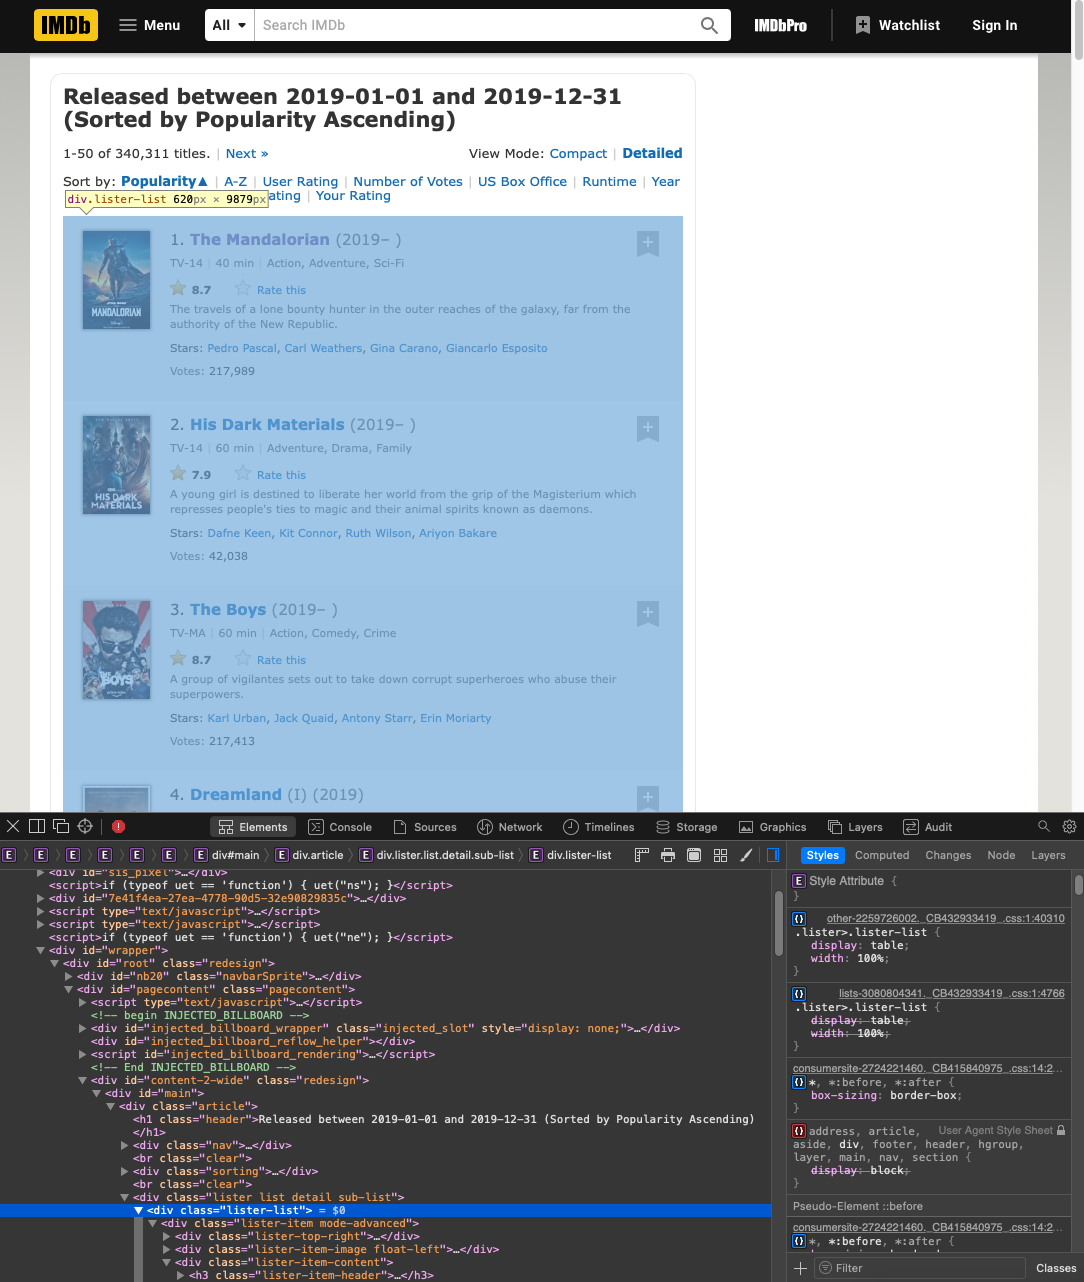

In [5]:
lister=table.find_all('div',attrs={'class':'lister-item-content'})
print(len(lister))
lister[:3]

50


[<div class="lister-item-content">
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">1.</span>
 <a href="/title/tt8111088/">The Mandalorian</a>
 <span class="lister-item-year text-muted unbold">(2019– )</span>
 </h3>
 <p class="text-muted">
 <span class="runtime">40 min</span>
 <span class="ghost">|</span>
 <span class="genre">
 Action, Adventure, Sci-Fi            </span>
 </p>
 <div class="ratings-bar">
 <div class="inline-block ratings-imdb-rating" data-value="8.7" name="ir">
 <span class="global-sprite rating-star imdb-rating"></span>
 <strong>8.7</strong>
 </div>
 <div class="inline-block ratings-user-rating">
 <span class="userRatingValue" data-tconst="tt8111088" id="urv_tt8111088">
 <span class="global-sprite rating-star no-rating"></span>
 <span class="rate" data-no-rating="Rate this" data-value="0" name="ur">Rate this</span>
 </span>
 <div class="starBarWidget" id="sb_tt8111088">
 <div class="rating rating-list" data-auth="" data-ga-identifi

Container for one movies/series:
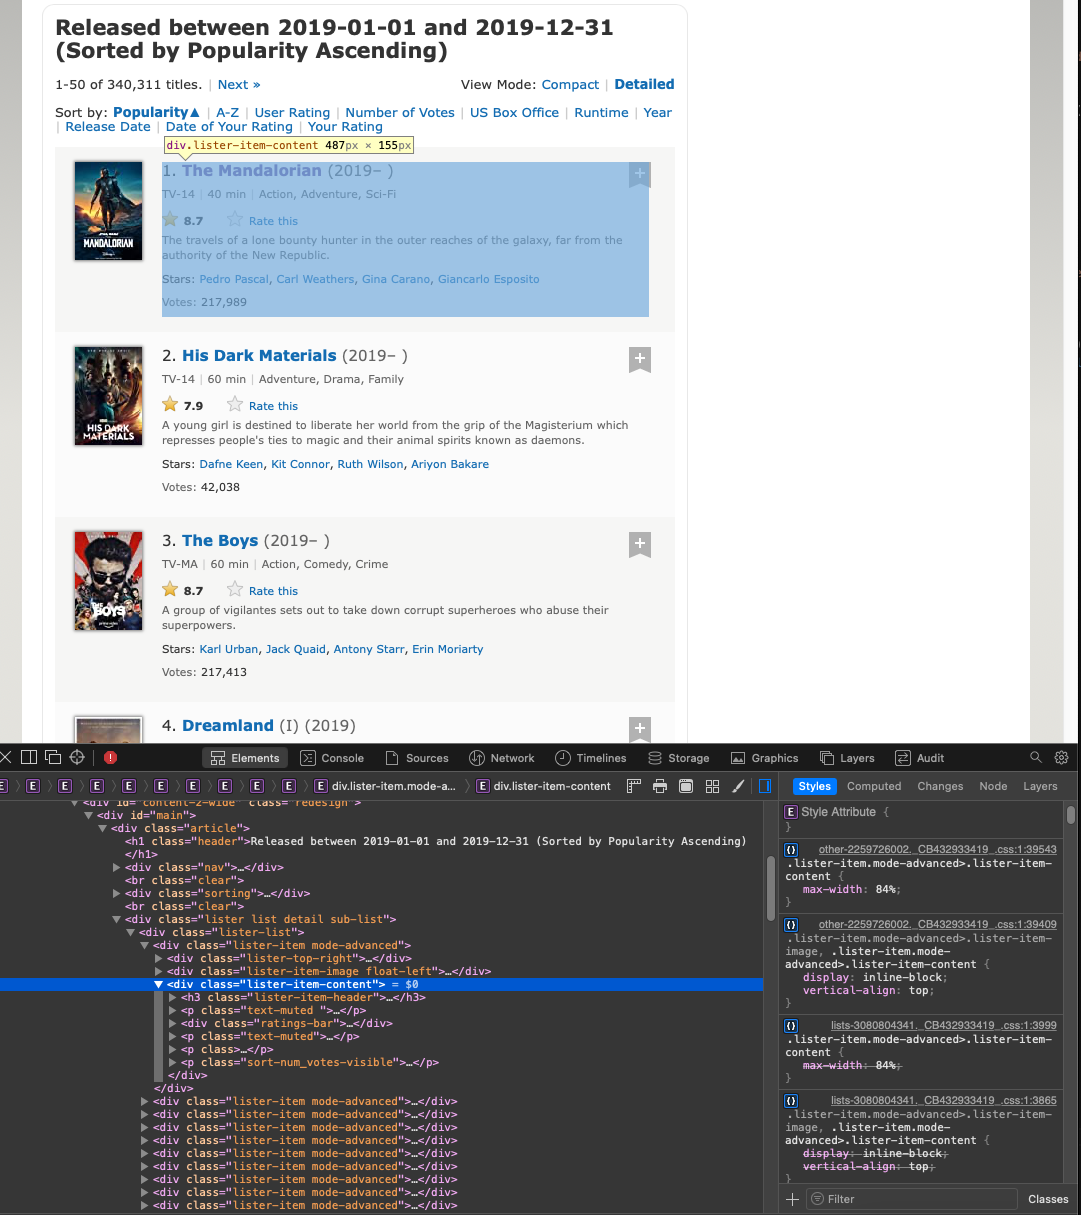

Below cell contains codes for retrieving:
- Title 
- IMDB Rating 
- Metacritic Score (not all movies/series have this score - the ones that do not have will be assigned score '0' through if-else method)
- Votes 

In [6]:
temp = [] #initiating a tuple

for i in range(0, len(lister)):
    row = lister[i]
    
    #get title
    title = row.find_all('a')[0].text.strip()

    #get imdb rating
    imdb_rating = row.find_all('strong')[0].text.strip()
    
    #get metacritic score
    if row.find('span',attrs={'class':'metascore mixed'}) == None: #if there is no metascore
        metascore = 0
    else:
        metascore = row.find('span',attrs={'class':'metascore mixed'}).text.strip()

    #get votes
    votes = row.find_all('span',attrs={'name':'nv'})[0].text.strip().replace(',','')
    
    temp.append((title,imdb_rating,metascore,votes))

temp

[('The Mandalorian', '8.7', 0, '218164'),
 ('His Dark Materials', '7.9', 0, '42059'),
 ('The Boys', '8.7', 0, '217484'),
 ('Dreamland', '5.7', '57', '1155'),
 ('Jojo Rabbit', '7.9', '58', '277575'),
 ('Servant', '7.6', 0, '15847'),
 ('Wayne', '8.4', 0, '8491'),
 ('The Gentlemen', '7.8', '51', '207387'),
 ('Undercover', '7.9', 0, '9402'),
 ('The Witcher', '8.2', 0, '282557'),
 ('Knives Out', '7.9', 0, '419101'),
 ('Gisaengchung', '8.6', 0, '511964'),
 ('Once Upon a Time... in Hollywood', '7.6', 0, '530717'),
 ('Joker', '8.5', '59', '900055'),
 ('Avengers: Endgame', '8.4', 0, '782407'),
 ('Sex Education', '8.3', 0, '148992'),
 ('Euphoria', '8.4', 0, '53581'),
 ('Warrior', '8.2', 0, '13070'),
 ('1917', '8.3', 0, '392934'),
 ('Midsommar', '7.1', 0, '190818'),
 ('Chernobyl', '9.4', 0, '513413'),
 ('Doctor Sleep', '7.3', '59', '135770'),
 ('Star Wars: Episode IX - The Rise of Skywalker', '6.6', '53', '359082'),
 ('The Unicorn', '7.2', 0, '2659'),
 ("The Dead Don't Die", '5.5', '53', '50384')

## Creating data frame & Data wrangling

Put the array into dataframe

In [7]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('title','imdb_rating','metascore','votes'))
df.head()

,title,imdb_rating,metascore,votes
0,The Mandalorian,8.7,0,218164
1,His Dark Materials,7.9,0,42059
2,The Boys,8.7,0,217484
3,Dreamland,5.7,57,1155
4,Jojo Rabbit,7.9,58,277575


Change type of data for several columns

In [8]:
df['imdb_rating']=df['imdb_rating'].astype('float64')
df[['metascore','votes']]=df[['metascore','votes']].astype('int64')

Set the title as index, sort the data based on number of votes for IMDB rating and take the top 7

In [9]:
top7popular=df.set_index('title').sort_values('votes',ascending=False).head(7)
top7popular

,imdb_rating,metascore,votes
title,,,
Joker,8.5,59,900055
Avengers: Endgame,8.4,0,782407
Once Upon a Time... in Hollywood,7.6,0,530717
Chernobyl,9.4,0,513413
Gisaengchung,8.6,0,511964
Knives Out,7.9,0,419101
1917,8.3,0,392934


Take column 'votes' only

In [10]:
top7popular_votes=top7popular['votes']
top7popular_votes

title
Joker                               900055
Avengers: Endgame                   782407
Once Upon a Time... in Hollywood    530717
Chernobyl                           513413
Gisaengchung                        511964
Knives Out                          419101
1917                                392934
Name: votes, dtype: int64

<AxesSubplot:ylabel='title'>

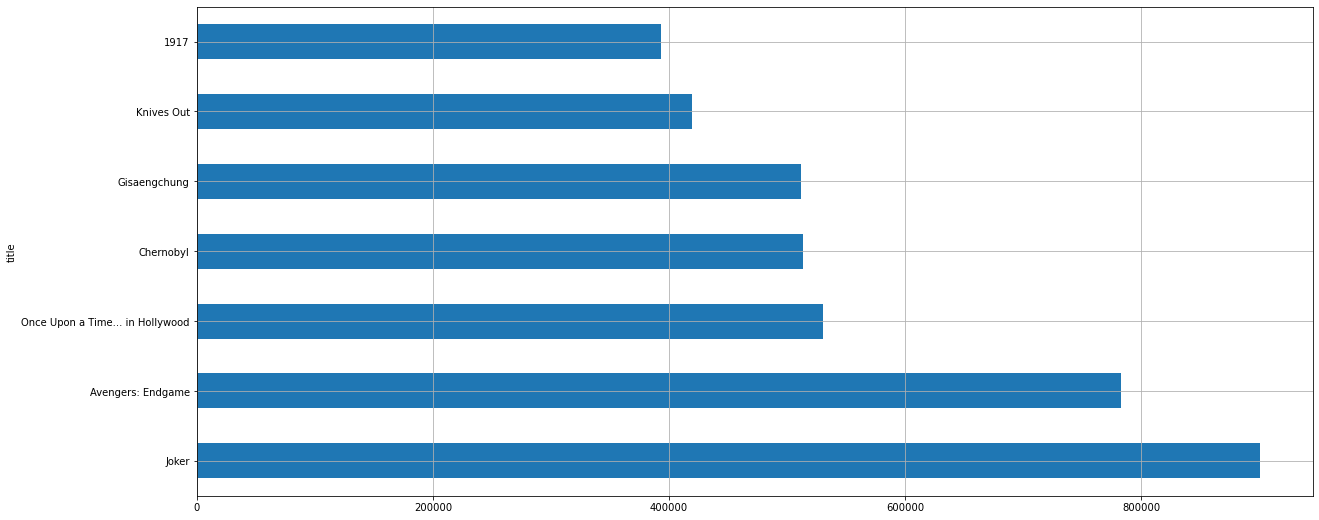

In [11]:
top7popular_votes.plot.barh(figsize = (20,9),grid=True)

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

### ***Top 7 Movies/series based on number of votes***
The original list from https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31 is already sorted by Popularity. The popularity on the site may be determined by number of people (or IP addressess) visiting individual movie/series. 

Below plots are another view of the popularity if we sorted them by the number of votes, as people usually vote after they watch the movies/series

<AxesSubplot:ylabel='title'>

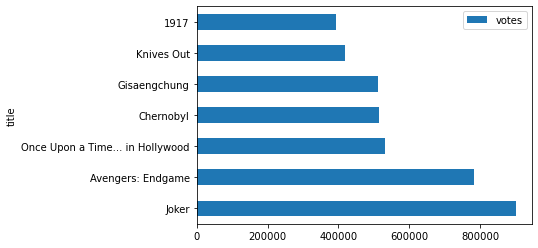

In [12]:
top7popular.plot.barh(y='votes')

...and the IMDB rating of the above top 7 movies/series

<AxesSubplot:ylabel='title'>

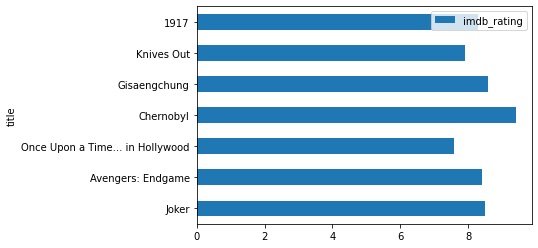

In [13]:
top7popular.plot.barh(y='imdb_rating')

### **IMDB vs Metascore**
From below plot, if the movies/series have both IMDB rating and Metascore, people tend to score them lower in Metascore (with the assumption Metascore 100 = IMDB rating 10).
For example, the movie with IMDB rating 7-8 (equivalent to 70-80) has no more than 60 Metascore.

Does this mean Metascore users are harsher on their assessment compared to IMDB users?

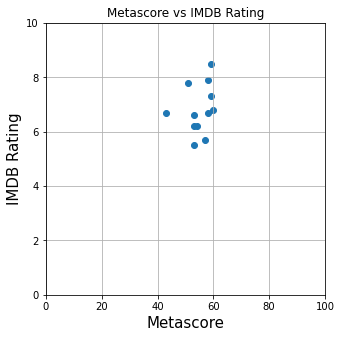

In [14]:
import matplotlib.pyplot as plt
df_wmetascore=df[df['metascore']!=0].set_index('title')

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(df_wmetascore['metascore'], df_wmetascore['imdb_rating'], alpha=1)

ax.set_xlabel(r'Metascore', fontsize=15)
ax.set_ylabel(r'IMDB Rating', fontsize=15)
ax.set_title('Metascore vs IMDB Rating')

ax.set_xlim([0,100])
ax.set_ylim([0,10])

ax.grid()

### IMDB Rating vs Votes
Looking at these there plots below, it seems there is no distinct relation between higher IMDB rating with number of votes. 
If we assume the number of votes relates to number of viewers (of the movies/series):
- popular movies/series (with high number of viewers) most likely to have high IMDB rating, but higher IMDB rating movies/series don't necessarily mean they are popular/more viewers/more votes


<AxesSubplot:ylabel='title'>

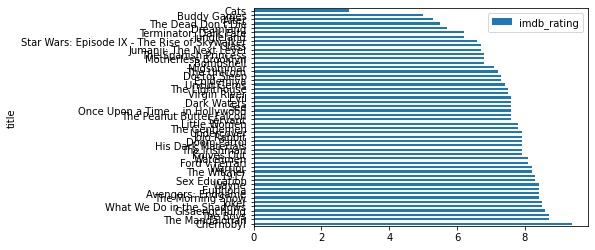

In [15]:
df.set_index('title').sort_values('imdb_rating',ascending=False).plot.barh(y='imdb_rating')

<AxesSubplot:ylabel='title'>

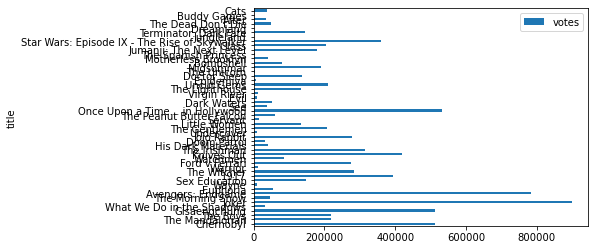

In [16]:
df.set_index('title').sort_values('imdb_rating',ascending=False).plot.barh(y='votes')

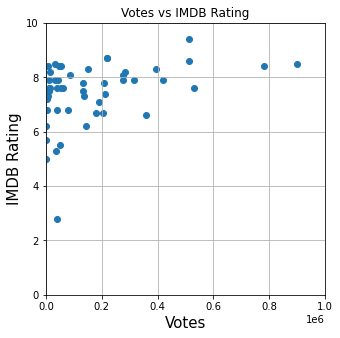

In [17]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['votes'], df['imdb_rating'], alpha=1)
ax.set_xlabel(r'Votes', fontsize=15)
ax.set_ylabel(r'IMDB Rating', fontsize=15)
ax.set_title('Votes vs IMDB Rating')
ax.set_xlim([0,1000000])
ax.set_ylim([0,10])
ax.grid()

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.